# linux
# Paquetes requerido
* !apt-get install ghostscript
* !pip install 'camelot-py[base]'
* !pip install 'camelot-py[cv]' -q
* !pip install 'PyPDF2<3.0'

In [1]:
import pandas as pd
import camelot
import matplotlib.pyplot as plt

In [2]:
archivo = 'Analisis Anual 2018 ETAS.pdf'

In [3]:
tabla = camelot.read_pdf(archivo, pages='3')

In [4]:
tabla[0].df

,0,1,2,3,4
0,AREA DE SALUD,2017,,2018,
1,,Casos,Tasas,Casos,Tasas
2,Ixcán \nSan Marcos \nIxil \nChiquimula \nSanta...,12777 \n64916 \n16229 \n25517 \n22257,10747.00 \n5531.76 \n8131.17 \n5995.79 \n5698.26,15484 \n83219 \n14009 \n28873 \n25857,12559.72 \n6937.18 \n6775.49 \n6629.64 \n6485.10
3,Zacapa \nHuehuetenango \nPetén Sur Occidental ...,13467 \n85754 \n14539 \n10657 \n15657 \n22885 ...,5499.70 \n6443.15 \n4960.76 \n4312.31 \n4504.7...,16111 \n87211 \n18107 \n14694 \n19647 \n32402 ...,6464.70 \n6409.30 \n5980.51 \n5787.55 \n5533.6...
4,Total País,662901,3914.98,756338,4369.10


In [5]:
area = list(map(lambda area: area.strip(), tabla[0].df[0][2].split('\n')))
area.extend(list(map(lambda area: area.strip(), tabla[0].df[0][3].split('\n'))))
area

['Ixcán',
 'San Marcos',
 'Ixil',
 'Chiquimula',
 'Santa Rosa',
 'Zacapa',
 'Huehuetenango',
 'Petén Sur Occidental',
 'Petén Sur Oriental',
 'Retalhuleu',
 'Totonicapán',
 'Escuintla',
 'Sololá',
 'Baja Verapaz',
 'Jutiapa',
 'El Progreso',
 'El Quiche',
 'Quetzaltenango',
 'Alta Verapaz',
 'Jalapa',
 'Petén Norte',
 'Sacatepéquez',
 'Chimaltenango',
 'Izabal',
 'Suchitepéquez',
 'Guatemala Central',
 'Guatemala Nor Occidente',
 'Guatemala Nor Oriente',
 'Guatemala Sur']

In [6]:
casos2017 = [int(casos.strip()) for casos in tabla[0].df[1][2].split('\n')]
casos2017.extend([int(casos.strip()) for casos in tabla[0].df[1][3].split('\n')])
casos2017

tasas2017 = [float(tasas.strip()) for tasas in tabla[0].df[2][2].split('\n')]
tasas2017.extend([float(tasas.strip()) for tasas in tabla[0].df[2][3].split('\n')])
tasas2017

[10747.0,
 5531.76,
 8131.17,
 5995.79,
 5698.26,
 5499.7,
 6443.15,
 4960.76,
 4312.31,
 4504.74,
 4019.22,
 4298.09,
 4322.31,
 5807.95,
 4250.63,
 4451.2,
 4919.3,
 4046.49,
 3293.58,
 3993.98,
 3301.02,
 3367.29,
 2424.97,
 2616.37,
 1890.35,
 2056.39,
 1532.4,
 1411.86,
 1448.55]

In [7]:
casos2018 = [int(casos.strip()) for casos in tabla[0].df[3][2].split('\n')]
casos2018.extend([int(casos.strip()) for casos in tabla[0].df[3][3].split('\n')])
casos2018

tasas2018 = [float(casos.strip()) for casos in tabla[0].df[4][2].split('\n')]
tasas2018.extend([float(casos.strip()) for casos in tabla[0].df[4][3].split('\n')])
tasas2018

[12559.72,
 6937.18,
 6775.49,
 6629.64,
 6485.1,
 6464.7,
 6409.3,
 5980.51,
 5787.55,
 5533.66,
 5533.33,
 5295.25,
 5252.97,
 5181.3,
 5165.63,
 4677.95,
 4587.3,
 4446.17,
 4302.25,
 3895.74,
 3553.11,
 3233.51,
 2704.24,
 2632.93,
 2042.5,
 1959.05,
 1690.64,
 1550.66,
 1416.07]

In [8]:
etas = pd.DataFrame(area, columns=['Area de Salud'])
etas['Casos 2017'] = casos2017
etas['Tasas 2017'] = tasas2017
etas['Casos 2018'] = casos2018
etas['Tasas 2018'] = tasas2018
etas

,Area de Salud,Casos 2017,Tasas 2017,Casos 2018,Tasas 2018
0,Ixcán,12777,10747.00,15484,12559.72
1,San Marcos,64916,5531.76,83219,6937.18
2,Ixil,16229,8131.17,14009,6775.49
3,Chiquimula,25517,5995.79,28873,6629.64
4,Santa Rosa,22257,5698.26,25857,6485.10
5,Zacapa,13467,5499.70,16111,6464.70
6,Huehuetenango,85754,6443.15,87211,6409.30
7,Petén Sur Occidental,14539,4960.76,18107,5980.51
8,Petén Sur Oriental,10657,4312.31,14694,5787.55
9,Retalhuleu,15657,4504.74,19647,5533.66


<Axes: >

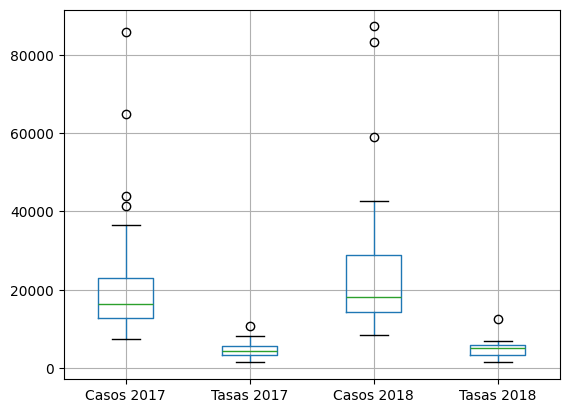

In [9]:
etas.boxplot()

In [37]:
tabla = camelot.read_pdf(archivo, pages='10')
tabla[0].df

,0,1,2,3,4
0,AREA DE SALUD,2017,,2018,
1,,Casos,Tasas,Casos,Tasas
2,Suchitepéquez \nHuehuetenango \nSanta Rosa \nR...,1 \n41 \n34 \n0 \n0,0.17 \n3.08 \n8.70,49 \n74 \n18 \n8 \n7,8.03 \n5.44 \n4.51 \n2.25 \n2.17
3,Totonicapán \nSacatepéquez \nIxcán \nEscuintla...,1 \n2 \n0 \n3 \n0 \n19 \n1 \n3 \n2 \n0 \n3 \n4...,0.18 \n0.56 \n \n0.38 \n \n1.91 \n0.21 \n0.5...,10 \n6 \n2 \n12 \n3 \n7 \n2 \n1 \n2 \n1 \n1 \n1,1.71 \n1.65 \n1.62 \n1.49 \n1.20 \n0.70 \n0.41...
4,Total PAIS,215,1.27,204,1.18


In [47]:
area = list(map(lambda area: area.strip(), tabla[0].df[0][2].split('\n')))
area.extend(list(map(lambda area: area.strip(), tabla[0].df[0][3].split('\n'))))

casos2017 = [int(casos.strip()) for casos in tabla[0].df[1][2].split('\n')]
casos2017.extend([int(casos.strip()) for casos in tabla[0].df[1][3].split('\n')])

tasas2017 = [float(tasas.strip()) if tasas.strip() else 0 
             for tasas in tabla[0].df[2][2].split('\n')]
tasas2017.extend([0,0])
tasas2017.extend([float(tasas.strip()) if tasas.strip() else 0 
                  for tasas in tabla[0].df[2][3].split('\n')])


casos2018 = [int(casos.strip()) for casos in tabla[0].df[3][2].split('\n')]
casos2018.extend([int(casos.strip()) for casos in tabla[0].df[3][3].split('\n')])
casos2018.extend([0]*5)

tasas2018 = [float(tasas.strip()) if tasas.strip() else 0 
             for tasas in tabla[0].df[4][2].split('\n')]
tasas2018.extend([float(tasas.strip()) if tasas.strip() else 0 
                  for tasas in tabla[0].df[4][3].split('\n')])
tasas2018.extend([0]*5)

etas = pd.DataFrame(area, columns=['Area de Salud'])
etas['Casos 2017'] = casos2017
etas['Tasas 2017'] = tasas2017
etas['Casos 2018'] = casos2018
etas['Tasas 2018'] = tasas2018
etas

,Area de Salud,Casos 2017,Tasas 2017,Casos 2018,Tasas 2018
0,Suchitepéquez,1,0.17,49,8.03
1,Huehuetenango,41,3.08,74,5.44
2,Santa Rosa,34,8.70,18,4.51
3,Retalhuleu,0,0.00,8,2.25
4,Baja Verapaz,0,0.00,7,2.17
5,Totonicapán,1,0.18,10,1.71
6,Sacatepéquez,2,0.56,6,1.65
7,Ixcán,0,0.00,2,1.62
8,Escuintla,3,0.38,12,1.49
9,Zacapa,0,0.00,3,1.20
